Linear regression, Ridge and Lasso

In [1]:
## House Pricing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = fetch_california_housing()


In [4]:
type(df)

sklearn.utils._bunch.Bunch

In [5]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
## Convert df into a proper dataframe
dataset = pd.DataFrame(df.data)

In [7]:
## Adding the column names to the dataframe using the 'feature_names' from the original loaded df(note: below are only the independent variables)
dataset.columns = df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
## Retrieving the target/dependent variables from the originial loaded, df 'target', and add them into a new column called price into the dataframe
dataset['Price'] = df.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
# Independent and dependent variables
X = dataset.iloc[:, :-1]  # keep original column names
y = dataset['Price']

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [12]:
# Splitting the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
## Linear regression with cross validation
lin_reg = LinearRegression()
neg_mse_scores = cross_val_score(lin_reg, X_train_scaled,y_train,scoring='neg_mean_squared_error',cv = 5)
mean_mse = np.mean(neg_mse_scores)
std_mse = np.std(neg_mse_scores)
print(f"Mean CV MSE: {mean_mse:.4f}")
print(f"STD of CV MSE: {std_mse:.4f}")

Mean CV MSE: -0.5193
STD of CV MSE: 0.0149


In [15]:
# Converting mean mse to rmse to interpret the magnitude of the error

mean_rmse = np.sqrt(-mean_mse)
print(mean_rmse)

0.720600583640735


In [16]:
# Create a summary table that shows corresponding feature coefficients
lin_reg.fit(X_train_scaled,y_train)    # must fit first before accessing the coeffcients or intercepts
summary = pd.DataFrame({
    'Feature': X.columns,  # feature names
    'Coefficient': lin_reg.coef_
})
summary

,Feature,Coefficient
0,MedInc,0.854383
1,HouseAge,0.122546
2,AveRooms,-0.294410
3,AveBedrms,0.339259
4,Population,-0.002308
5,AveOccup,-0.040829
6,Latitude,-0.896929
7,Longitude,-0.869842


In [17]:
## Add cross-validated MSE info
summary['CV_Neg_MSE'] = np.mean(neg_mse_scores)  # same mean for all rows
summary['CV_Neg_MSE_STD'] = np.std(neg_mse_scores)  # same std for all rows
summary

,Feature,Coefficient,CV_Neg_MSE,CV_Neg_MSE_STD
0,MedInc,0.854383,-0.519265,0.014894
1,HouseAge,0.122546,-0.519265,0.014894
2,AveRooms,-0.294410,-0.519265,0.014894
3,AveBedrms,0.339259,-0.519265,0.014894
4,Population,-0.002308,-0.519265,0.014894
5,AveOccup,-0.040829,-0.519265,0.014894
6,Latitude,-0.896929,-0.519265,0.014894
7,Longitude,-0.869842,-0.519265,0.014894


In [18]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [19]:
# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_params = {'alpha':[1e-3, 1e-2, 0.1, 1, 5, 10, 20, 50, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=15)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [20]:
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

{'alpha': 1}
-0.5197972422122379


In [21]:
# Create a DataFrame with feature names and their coefficients
ridge = Ridge(alpha=1.0)  # choose alpha
ridge.fit(X_train_scaled, y_train)    # fit the model
coef_table = pd.DataFrame({
    'Feature': X.columns,       # column names
    'Coefficient': ridge.coef_  # fitted coefficients
})
coef_table

,Feature,Coefficient
0,MedInc,0.854327
1,HouseAge,0.122624
2,AveRooms,-0.294210
3,AveBedrms,0.339008
4,Population,-0.002282
5,AveOccup,-0.040833
6,Latitude,-0.896168
7,Longitude,-0.869071


Since the ridge regression score of -0.5197 is very very similar to the linear regression score of 0.5193, which means ridge did not really improve as much. So will try Lasso regression next

In [22]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [23]:
# Lasso Regression with GridSearchCV
lasso = Lasso()
lasso_params = {'alpha':[1e-10, 1e-2, 0.1, 1, 5, 10, 20,30,35,40,45,50,55,100]}
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=15)
lasso_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 0.01, 0.1, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [24]:
print(lasso_grid.best_params_)
print(lasso_grid.best_score_)

{'alpha': 1e-10}
-0.5197976842098386


In [25]:
# Create a DataFrame with feature names and their coefficients
lasso= Lasso(alpha=1e-10)  # choose alpha
lasso.fit(X_train_scaled, y_train)    # fit the model
coef_table = pd.DataFrame({
    'Feature': X.columns,       # column names
    'Coefficient': lasso.coef_  # fitted coefficients
})
coef_table

,Feature,Coefficient
0,MedInc,0.854383
1,HouseAge,0.122546
2,AveRooms,-0.294410
3,AveBedrms,0.339259
4,Population,-0.002308
5,AveOccup,-0.040829
6,Latitude,-0.896929
7,Longitude,-0.869842


From all of the above, it looks like that linear regression performs slightly better than ridge and lasso

In [26]:
y_pred = lin_reg.predict(X_test_scaled)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score1 = r2_score(y_pred, y_test)
print(r2_score1)

0.33767016589309884


Since all three regressions are not peforming that great, I decided to reexam the data for missing values or outliers

In [29]:
# Check if any missing values exist
dataset.isnull().values.any()


False

In [30]:
# Identifying outliers using the IQR method
# Compute Q1, Q3 and IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Flag outliers
outlier_flags = ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR)))

# Create summary table
outlier_summary = pd.DataFrame({
    'Feature': dataset.columns,
    'Num_Outliers': outlier_flags.sum().values,
    'Percent_Outliers': (outlier_flags.sum() / len(dataset) * 100).values
})

print(outlier_summary)



      Feature  Num_Outliers  Percent_Outliers
0      MedInc           681          3.299419
1    HouseAge             0          0.000000
2    AveRooms           511          2.475775
3   AveBedrms          1424          6.899225
4  Population          1196          5.794574
5    AveOccup           711          3.444767
6    Latitude             0          0.000000
7   Longitude             0          0.000000
8       Price          1071          5.188953


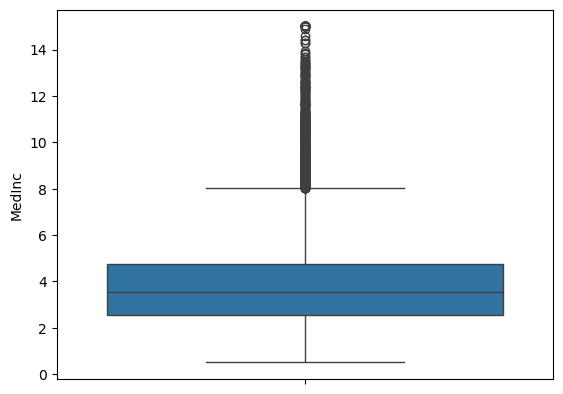

In [31]:
# See outliers using visual method by plotting box plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y = dataset['MedInc'])
plt.show()

<Figure size 1200x1000 with 0 Axes>

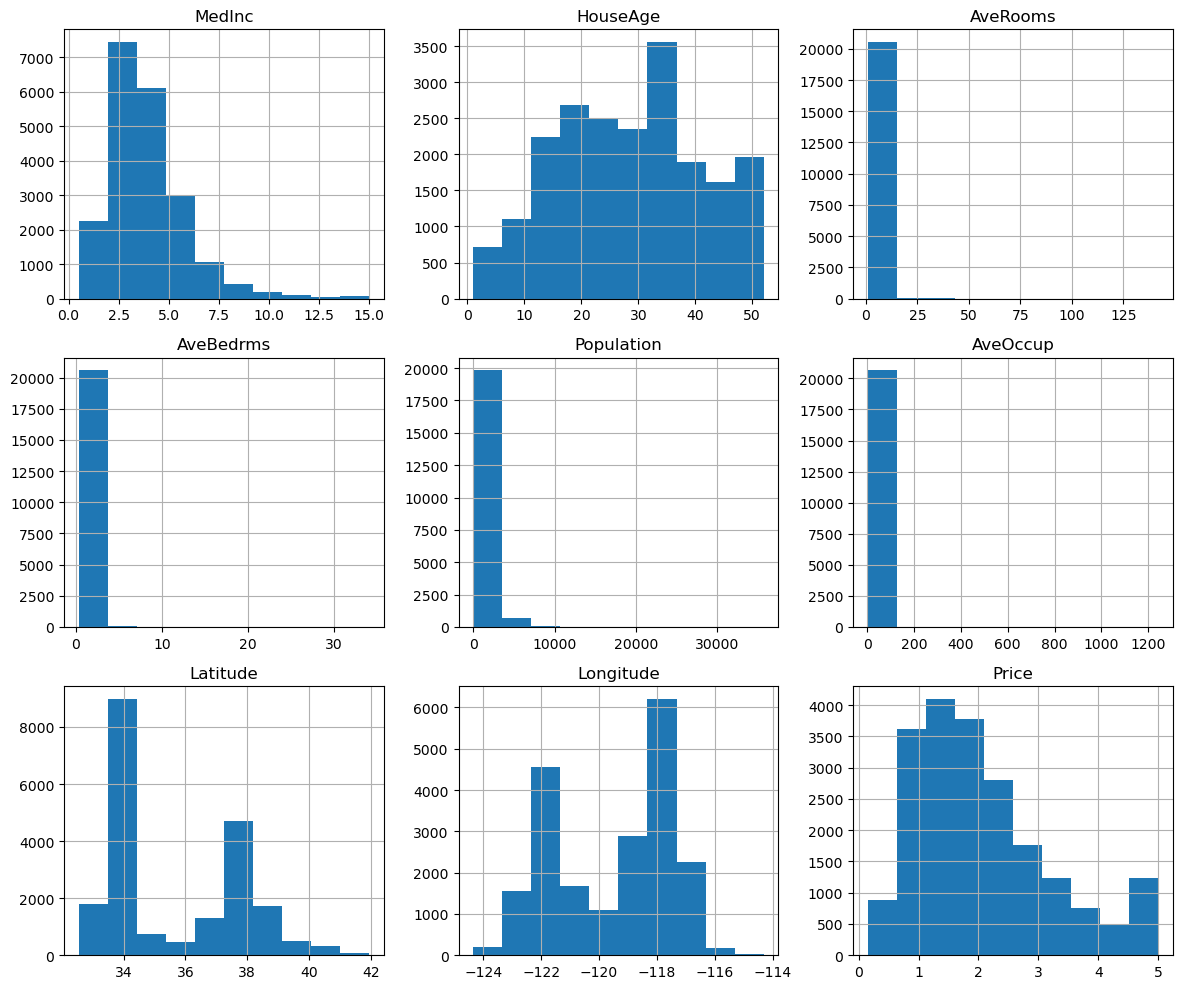

In [ ]:
# Creating histograms for all of the features to confirm normality
plt.figure(figsize=(12, 10))   
dataset.hist(figsize=(12, 10))
plt.tight_layout()            
plt.show()

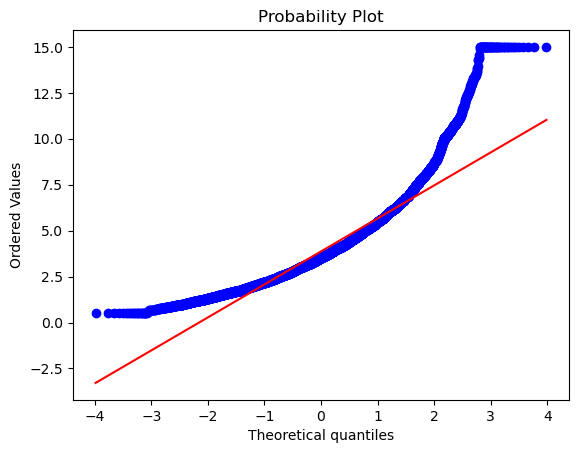

In [ ]:
# Creating Q-Q plot to confirm normality

import scipy.stats as stats

stats.probplot(dataset['MedInc'], dist="norm", plot=plt)
plt.show()

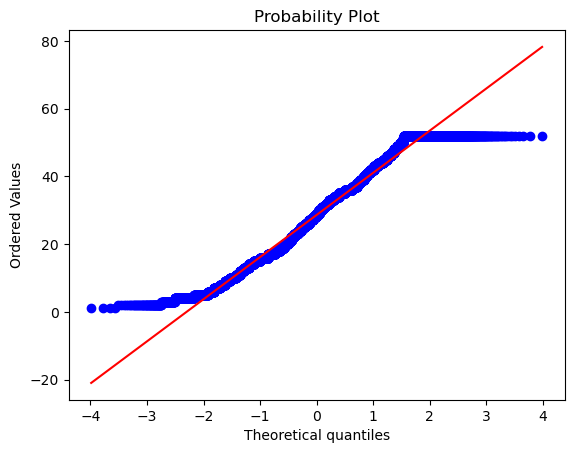

In [46]:
stats.probplot(dataset['HouseAge'], dist="norm", plot=plt)
plt.show()

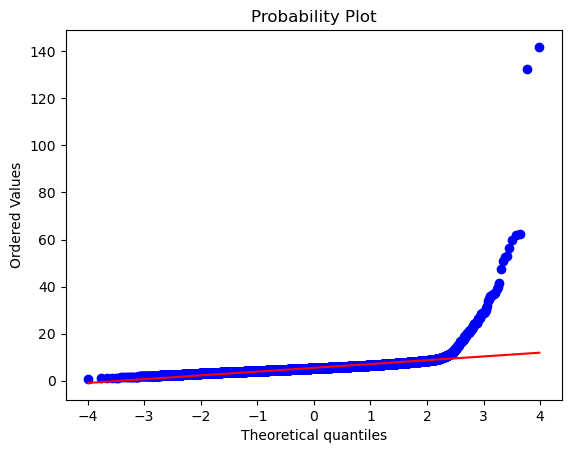

In [47]:
stats.probplot(dataset['AveRooms'], dist="norm", plot=plt)
plt.show()

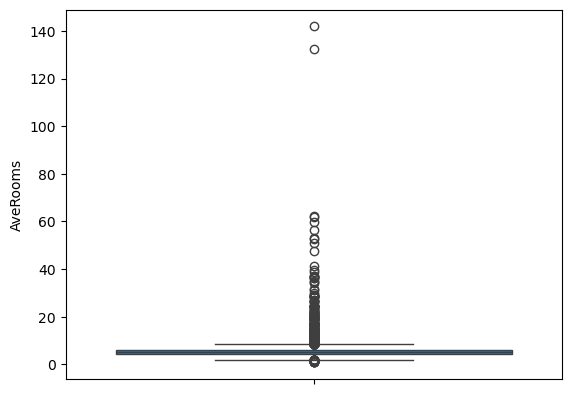

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y = dataset['AveRooms'])
plt.show()

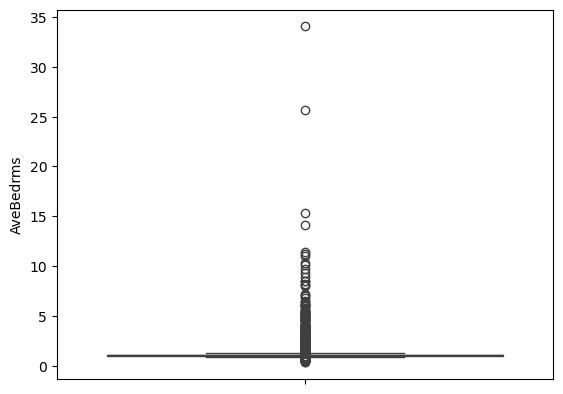

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y = dataset['AveBedrms'])
plt.show()

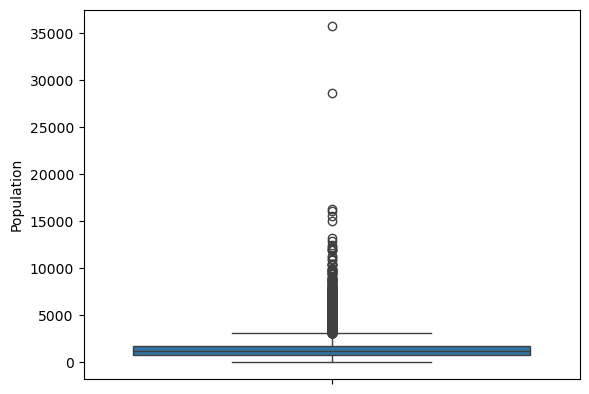

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y = dataset['Population'])
plt.show()

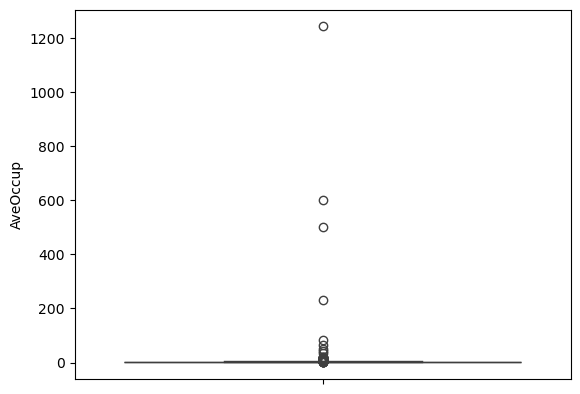

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y = dataset['AveOccup'])
plt.show()

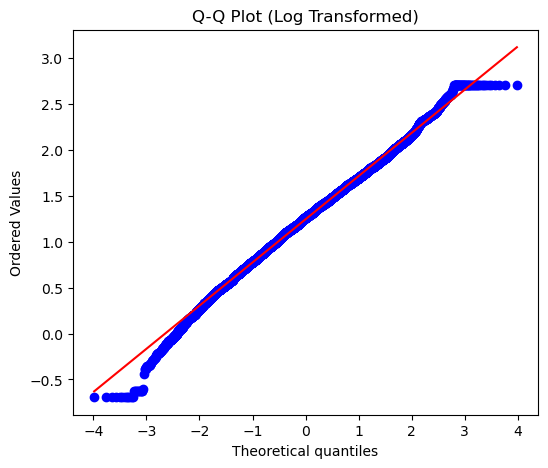

In [64]:
# Try log transformation

log_medinc = np.log(dataset['MedInc'])

plt.figure(figsize=(6,5))
stats.probplot(log_medinc, dist="norm", plot=plt)
plt.title("Q-Q Plot (Log Transformed)")
plt.show()

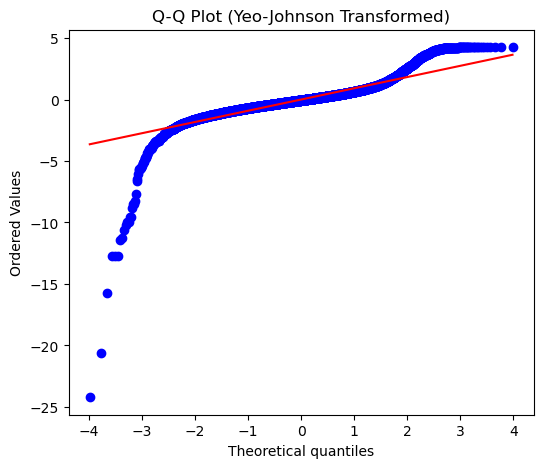

In [58]:
# Try Yeo-Johnson transformation (This automatically finds the best transformation to reduce skewness.)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
avebedrms_yj = pt.fit_transform(dataset['AveBedrms'].values.reshape(-1,1))

plt.figure(figsize=(6,5))
stats.probplot(avebedrms_yj.ravel(), dist="norm", plot=plt)
plt.title("Q-Q Plot (Yeo-Johnson Transformed)")
plt.show()

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
averooms_yj = pt.fit_transform(dataset['AveRooms'].values.reshape(-1,1))

plt.figure(figsize=(6,5))
stats.probplot(averooms_yj.ravel(), dist="norm", plot=plt)
plt.title("Q-Q Plot (Yeo-Johnson Transformed)")
plt.show()

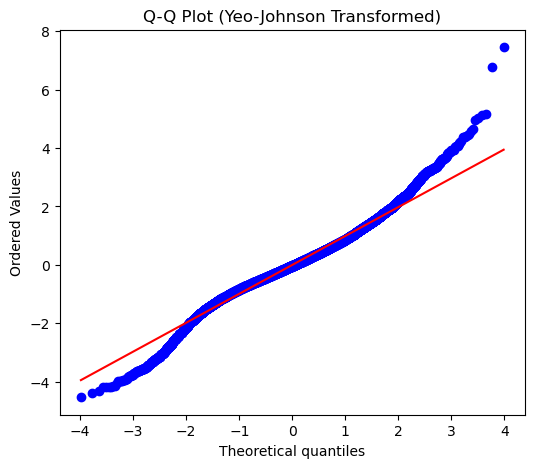

In [59]:
pt = PowerTransformer(method='yeo-johnson')
population_yj = pt.fit_transform(dataset['Population'].values.reshape(-1,1))

plt.figure(figsize=(6,5))
stats.probplot(population_yj.ravel(), dist="norm", plot=plt)
plt.title("Q-Q Plot (Yeo-Johnson Transformed)")
plt.show()

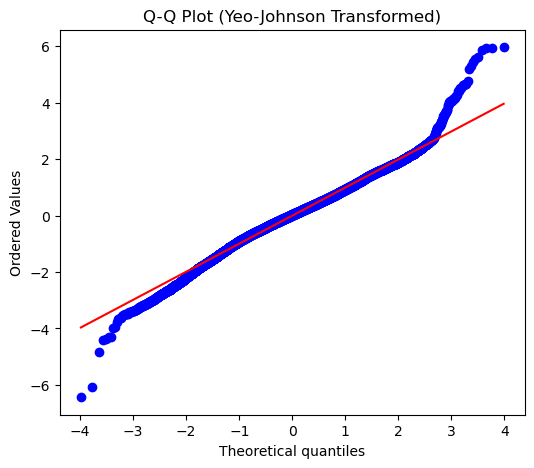

In [60]:
pt = PowerTransformer(method='yeo-johnson')
aveoccup_yj = pt.fit_transform(dataset['AveOccup'].values.reshape(-1,1))

plt.figure(figsize=(6,5))
stats.probplot(aveoccup_yj.ravel(), dist="norm", plot=plt)
plt.title("Q-Q Plot (Yeo-Johnson Transformed)")
plt.show()

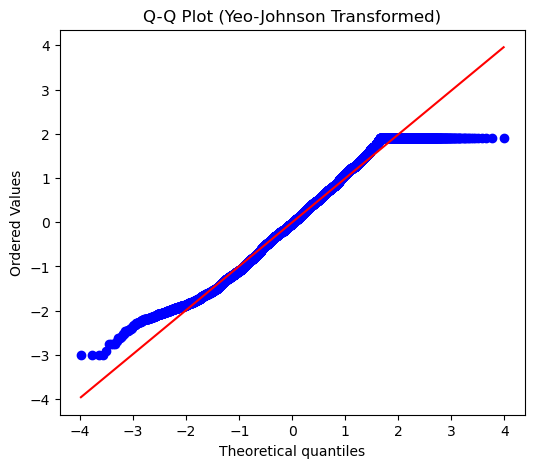

In [61]:
pt = PowerTransformer(method='yeo-johnson')
price_yj = pt.fit_transform(dataset['Price'].values.reshape(-1,1))

plt.figure(figsize=(6,5))
stats.probplot(price_yj.ravel(), dist="norm", plot=plt)
plt.title("Q-Q Plot (Yeo-Johnson Transformed)")
plt.show()

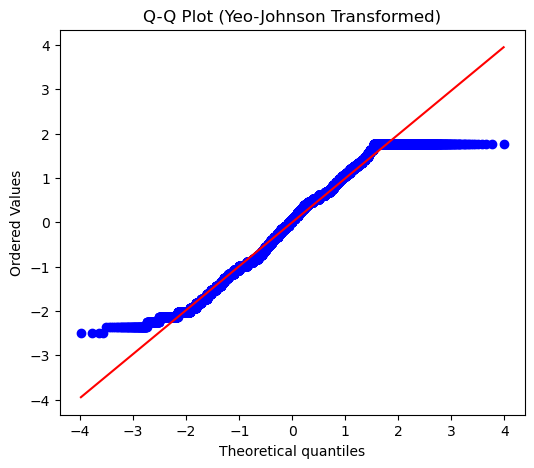

In [62]:
pt = PowerTransformer(method='yeo-johnson')
houseage_yj = pt.fit_transform(dataset['HouseAge'].values.reshape(-1,1))

plt.figure(figsize=(6,5))
stats.probplot(houseage_yj.ravel(), dist="norm", plot=plt)
plt.title("Q-Q Plot (Yeo-Johnson Transformed)")
plt.show()

In [69]:
print(X.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [71]:
X['log_medinc'] = log_medinc
X['avebedrms_yj'] = avebedrms_yj
X['averooms_yj'] = averooms_yj
X['population_yj'] = population_yj
X['aveoccup_yj'] = aveoccup_yj
X['price_yj'] = price_yj

In [74]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,log_medinc,avebedrms_yj,averooms_yj,population_yj,aveoccup_yj,price_yj
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.119287,-0.296934,1.106394,-1.619967,-0.368763,1.715878
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.116424,-0.847336,0.712367,1.090355,-1.186265,1.281389
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.982022,0.162493,1.673645,-1.139853,0.005053,1.247506
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.730434,0.159137,0.461045,-1.000270,-0.381080,1.188835
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.347086,0.228006,0.737176,-0.985268,-1.040230,1.193798


In [76]:
X_transform = X.iloc[:,6:-1]
y_transform = X['price_yj']

In [77]:
X_transform_train, X_transform_test, y_transform_train, y_transform_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=42)

In [78]:
scaler = StandardScaler()
X_transform_train_scaled = scaler.fit_transform(X_transform_train)
X__transform_test_scaled = scaler.transform(X_transform_test)

In [79]:
lin_reg = LinearRegression()
neg_mse_scores = cross_val_score(lin_reg, X_transform_train_scaled,y_transform_train,scoring='neg_mean_squared_error',cv = 5)
mean_mse = np.mean(neg_mse_scores)
std_mse = np.std(neg_mse_scores)
print(f"Mean CV MSE: {mean_mse:.4f}")
print(f"STD of CV MSE: {std_mse:.4f}")

Mean CV MSE: -0.3279
STD of CV MSE: 0.0088


In [80]:
mean_rmse = np.sqrt(-mean_mse)
print(mean_rmse)

0.5725878888595392


In [81]:
lin_reg.fit(X_transform_train_scaled,y_transform_train)    # must fit first before accessing the coeffcients or intercepts
summary = pd.DataFrame({
    'Feature': X_transform.columns,  # feature names
    'Coefficient': lin_reg.coef_
})
summary

,Feature,Coefficient
0,Latitude,-1.013385
1,Longitude,-0.932685
2,log_medinc,0.649547
3,avebedrms_yj,0.096993
4,averooms_yj,-0.104125
5,population_yj,-0.004785
6,aveoccup_yj,-0.213541


In [82]:
y_transform_pred = lin_reg.predict(X__transform_test_scaled)


In [83]:
r2_score_transform  = r2_score(y_transform_pred,y_test)
print(r2_score_transform)

-6.164731668367529


In [36]:
## Logistic regression
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.datasets import load_breast_cancer

In [38]:
df = load_breast_cancer()
type(df)


sklearn.utils._bunch.Bunch

In [39]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
### Independent Features
X = pd.DataFrame(df['data'],columns = df['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
### Dependent Features

y = pd.DataFrame(df['target'], columns = ["Target"])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0
